In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.ndimage import interpolation
from matplotlib.colors import hsv_to_rgb
from skimage.restoration import unwrap_phase
from mpl_toolkits.axes_grid1 import AxesGrid

In [2]:
folder = 'E:/4D-STEM/Shoucong/Leyi Sample/20211013/remos2_testwithGatan_2/20211013 223804_GB3/'
dat4d = np.load(folder+'data.npy')
pacbed = np.average(dat4d, axis=(0,1))

<ipython-input-3-920127fcfd76>:10: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  grid.cbar_axes[0].colorbar(im)
C:\Users\ningustc\anaconda3\lib\site-packages\mpl_toolkits\axes_grid1\axes_grid.py:46: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid1.colorbar module was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use matplotlib.colorbar instead.
  from .colorbar import Colorbar


Text(0.5, 1.0, 'position averaged CBED')

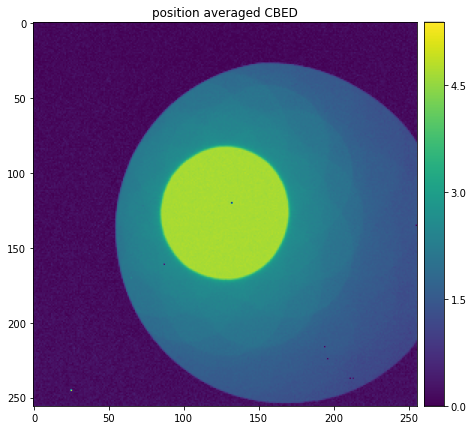

In [3]:
fig =plt.figure(1, figsize=(25, 25))
grid=AxesGrid(fig, 236, nrows_ncols=(1,1),
             axes_pad=0.5,
             share_all=False,
             cbar_location="right",
             cbar_mode="each",
             cbar_size="5%",
             cbar_pad="2%")
im=grid[0].imshow(np.log10(pacbed*10000+1), cmap=plt.cm.viridis)
grid.cbar_axes[0].colorbar(im)
grid[0].set_title("position averaged CBED")

<ipython-input-4-8a60b7ec260e>:17: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  grid.cbar_axes[0].colorbar(im)
<ipython-input-4-8a60b7ec260e>:22: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  grid.cbar_axes[2].colorbar(im)


Text(0.5, 1.0, 'Masked PACBED')

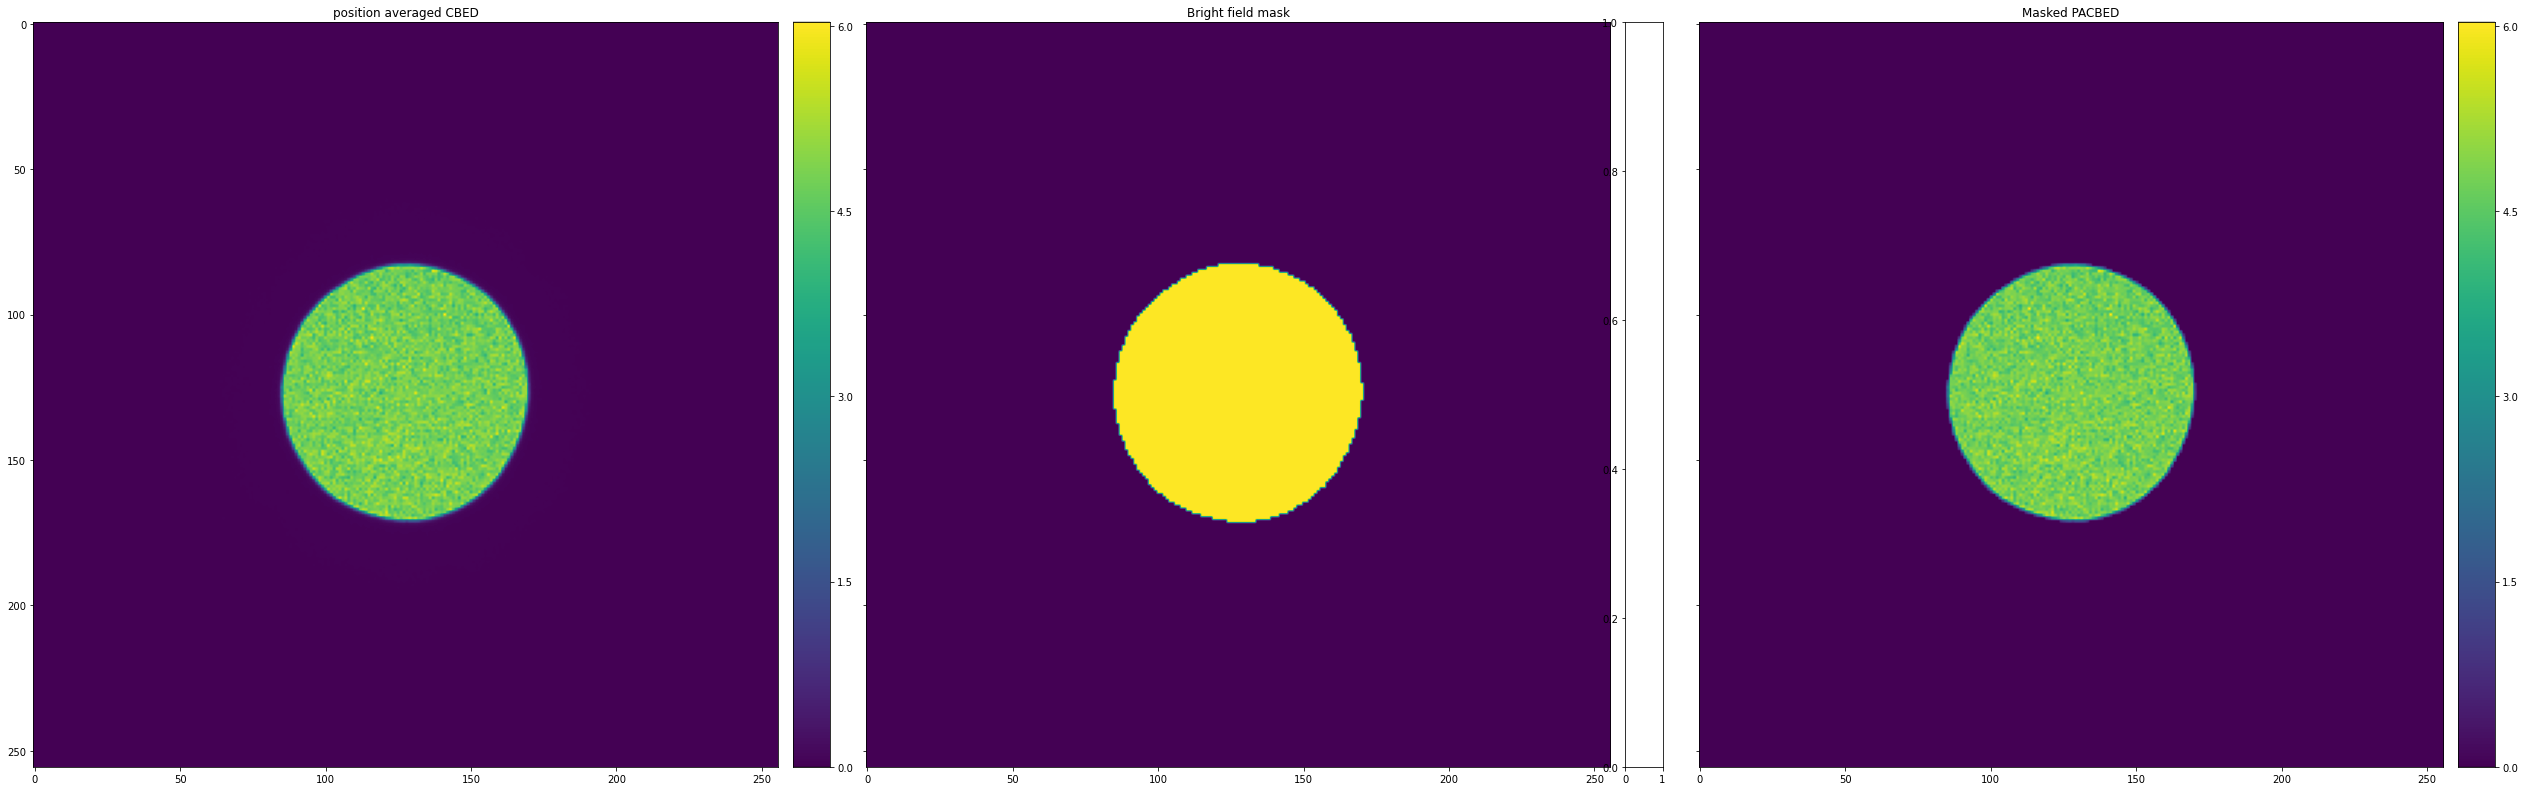

In [4]:
pacbed[120, 132] = pacbed[120, 131]
#pacbed[161, 87] = pacbed[120, 131]
pacbed[245, 25] = 0
thresh = np.average(pacbed)*2.0
BFdisk = pacbed > thresh
mpacbed = pacbed * BFdisk
#get the mask of aperture via threshold values.
fig =plt.figure(1, figsize=(150, 50))
grid=AxesGrid(fig, 236, nrows_ncols=(1,3),
             axes_pad=0.5,
             share_all=False,
             cbar_location="right",
             cbar_mode="each",
             cbar_size="5%",
             cbar_pad="2%")
im=grid[0].imshow(pacbed, cmap=plt.cm.viridis)
grid.cbar_axes[0].colorbar(im)
grid[0].set_title("position averaged CBED")
im=grid[1].imshow(BFdisk, cmap=plt.cm.viridis)
grid[1].set_title("Bright field mask")
im=grid[2].imshow(mpacbed, cmap=plt.cm.viridis)
grid.cbar_axes[2].colorbar(im)
grid[2].set_title("Masked PACBED")

In [5]:
#compute the center of aperture according to determined mask image. 
X, Y = np.meshgrid(np.arange(0, pacbed.shape[1]), np.arange(0, pacbed.shape[0]))
x_center, y_center =np.average(mpacbed * X), np.average(mpacbed * Y)
x_center/=np.average(mpacbed)
y_center/=np.average(mpacbed)
#get the edge of bright field apertuer and fit the radius in pixels. 
grad=np.sqrt(np.sum(np.square(np.abs(np.gradient(pacbed))), axis =0))
edge = grad > np.max(grad)*0.5
radius = np.average(np.sqrt((X - x_center) ** 2 + (Y - y_center) ** 2)[edge])
#get the half of the aperture to compute ABF
InnerBFdisk = (np.sqrt((X - x_center) ** 2 + (Y - y_center) ** 2))<(radius/2)
BFImage=[]
InnerBFImage=[]
for ycan in range(np.shape(dat4d)[0]):
    for xcan in range(np.shape(dat4d)[1]):
        BFImage.append(np.sum(dat4d[ycan,xcan,:,:]*BFdisk))
        InnerBFImage.append(np.sum(dat4d[ycan,xcan,:,:]*InnerBFdisk))
BFImage = np.reshape(np.asarray(BFImage), (np.shape(dat4d)[0], np.shape(dat4d)[1]))
InnerBFImage = np.reshape(np.asarray(InnerBFImage), (np.shape(dat4d)[0], np.shape(dat4d)[1]))
ADFImage = np.sum(dat4d, axis=(2,3))-BFImage
ABFImage = BFImage - InnerBFImage

<ipython-input-6-3e44f09e7fe4>:12: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  grid.cbar_axes[0].colorbar(im)
<ipython-input-6-3e44f09e7fe4>:15: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  grid.cbar_axes[1].colorbar(im)
<ipython-input-6-3e44f09e7fe4>:18: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar impleme

Text(0.5, 1.0, 'Annular Dark Field Image')

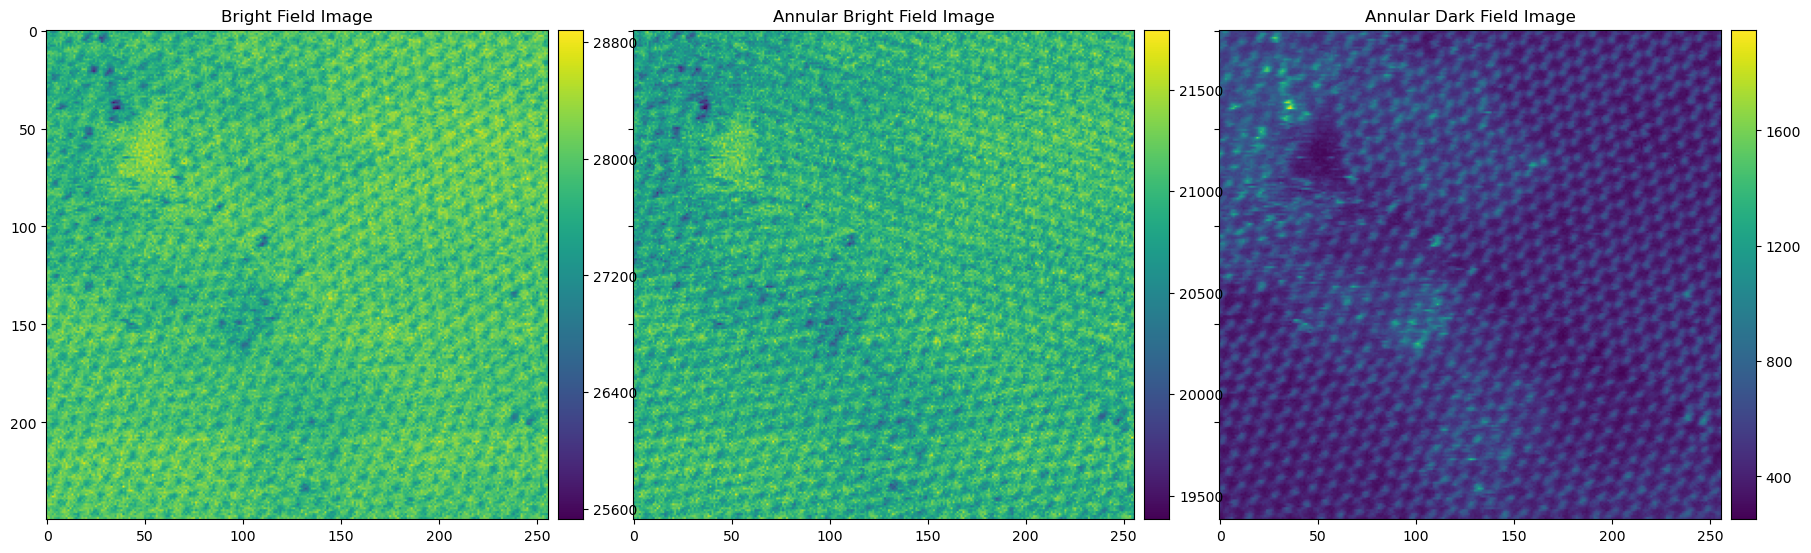

In [6]:
plt.rcParams['figure.dpi']=100
#get the mask of aperture via threshold values.
fig =plt.figure(1, figsize=(75, 25))
grid=AxesGrid(fig, 236, nrows_ncols=(1,3),
             axes_pad=0.5,
             share_all=False,
             cbar_location="right",
             cbar_mode="each",
             cbar_size="5%",
             cbar_pad="2%")
im=grid[0].imshow(BFImage, cmap=plt.cm.viridis)
grid.cbar_axes[0].colorbar(im)
grid[0].set_title("Bright Field Image")
im=grid[1].imshow(ABFImage, cmap=plt.cm.viridis)
grid.cbar_axes[1].colorbar(im)
grid[1].set_title("Annular Bright Field Image")
im=grid[2].imshow(ADFImage, cmap=plt.cm.viridis)
grid.cbar_axes[2].colorbar(im)
grid[2].set_title("Annular Dark Field Image")

In [7]:
#normalize the intensity of each line.
ratio = 1.0/np.average(dat4d, axis= (2, 3))
ratio = np.reshape(ratio, (dat4d.shape[0],dat4d.shape[1],1,1))
#trim the 4D-STEM dataset to reduce the computation time.
expansion = 1.2
x_start = int(x_center-expansion*radius)
y_start = int(y_center-expansion*radius)
x_end = int(x_center+expansion*radius)
y_end = int(y_center+expansion*radius)
dat4d_trim=dat4d[:,:,y_start:y_end,x_start:x_end]*ratio
pacbed_trim = pacbed[y_start:y_end,x_start:x_end]

<ipython-input-20-01b38e5087b2>:15: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  grid.cbar_axes[0].colorbar(im)


Text(0.5, 1.0, 'Aperture outline')

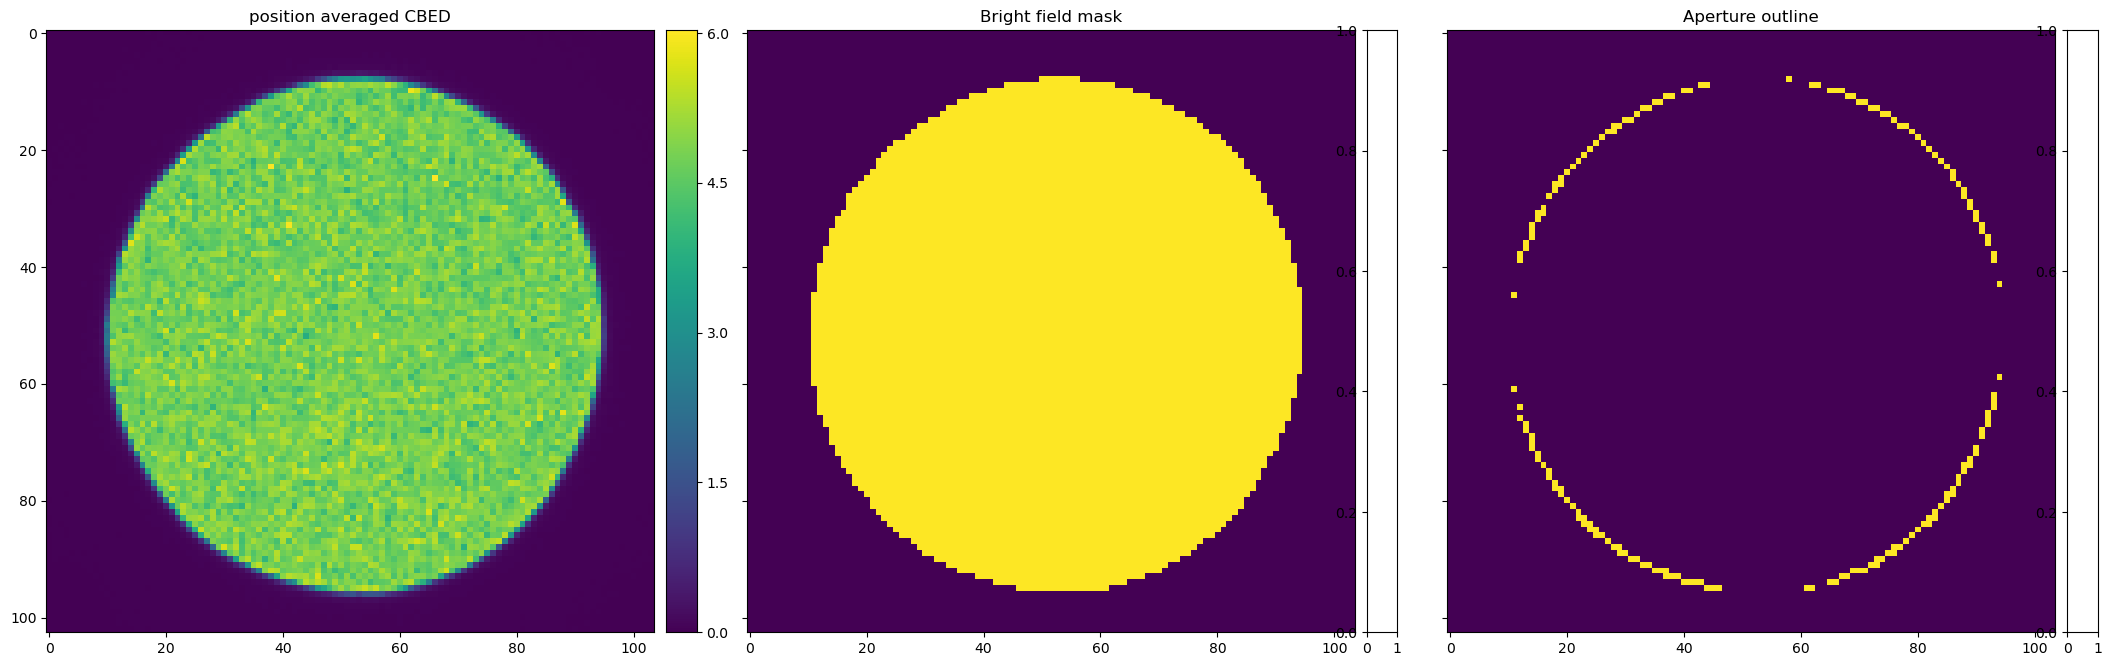

In [20]:
#get the pixels inside the aperture and get the outline of aperture.
thresh = np.average(pacbed_trim)*1.0
BFdisk = pacbed_trim > thresh
mpacbed_trim = pacbed_trim*BFdisk
outline = np.sum(np.abs(np.gradient(pacbed_trim)), axis=0)> 3.2
fig =plt.figure(1, figsize=(90, 30))
grid=AxesGrid(fig, 236, nrows_ncols=(1,3),
             axes_pad=0.5,
             share_all=False,
             cbar_location="right",
             cbar_mode="each",
             cbar_size="5%",
             cbar_pad="2%")
im=grid[0].imshow(pacbed_trim, cmap=plt.cm.viridis)
grid.cbar_axes[0].colorbar(im)
grid[0].set_title("position averaged CBED")
im=grid[1].imshow(BFdisk, cmap=plt.cm.viridis)
grid[1].set_title("Bright field mask")
#grid.cbar_axes[1].colorbar(im)
im=grid[2].imshow(outline, cmap=plt.cm.viridis)
#grid.cbar_axes[2].colorbar(im)
grid[2].set_title("Aperture outline")

In [9]:
def FFT_2D (array):
    result=np.fft.fft2(array)
    result=np.fft.fftshift(result)
    return result
def IFFT_2D (array):
    result=np.fft.ifftshift(array)
    result=np.fft.ifft2(result)
    return result

In [10]:
dat4D_Reci=np.zeros(dat4d_trim.shape,dtype=complex)
for i in range (dat4d_trim.shape[2]):
    for j in range (dat4d_trim.shape[3]):
        dat4D_Reci[:,:,i,j]=FFT_2D(dat4d_trim[:,:,i,j])

In [11]:
power_spectra =np.zeros((dat4D_Reci.shape[0],dat4D_Reci.shape[1]))
for i in range (dat4D_Reci.shape[0]):
    for j in range (dat4D_Reci.shape[1]):
        g=dat4D_Reci[i,j,:,:]
        power_spectra[i,j]=np.sum(g*np.conjugate(g)).real

<ipython-input-12-a7b8da597bf6>:16: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  grid.cbar_axes[0].colorbar(im)


Text(0.5, 1.0, 'power spectrum')

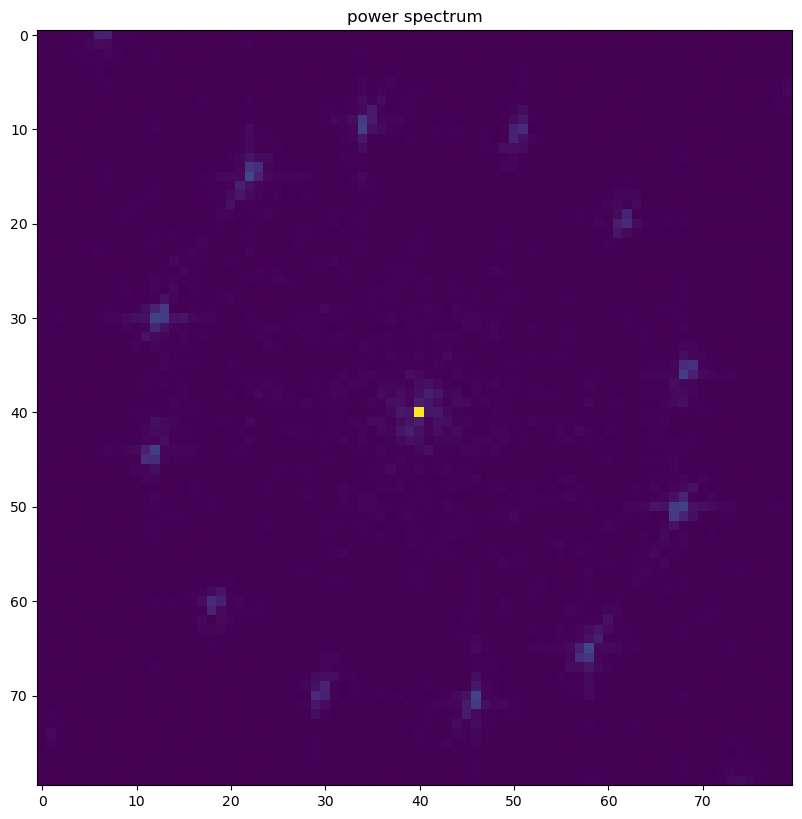

In [12]:
#plot the power spectrum
box = 40
pcenter_x = int(dat4D_Reci.shape[1]/2)
pcenter_y = int(dat4D_Reci.shape[0]/2)
dcenter_x = int(dat4D_Reci.shape[3]/2)
dcenter_y = int(dat4D_Reci.shape[2]/2)
fig =plt.figure(1, figsize=(10, 10))
grid=AxesGrid(fig, 111, nrows_ncols=(1,1),
             axes_pad=0.5,
             share_all=True,
             cbar_location="right",
             cbar_mode="share",
             cbar_size="5%",
             cbar_pad="2%")
im=grid[0].imshow(np.log(power_spectra[pcenter_y-box:pcenter_y+box,pcenter_x-box:pcenter_x+box]+0.001))
grid.cbar_axes[0].colorbar(im)
grid[0].set_title("power spectrum")

In [13]:
#determine the index of reciprocal positions with the largest intensity
idx=np.unravel_index(np.argsort(power_spectra, axis=None), power_spectra.shape)
descend_idx=(idx[0][::-1],idx[1][::-1])
print(descend_idx[0][1:17]-pcenter_y)
print(descend_idx[1][1:17]-pcenter_x)
#remove the 

[-25  25  10 -10  30 -30  -4   4  10 -10  31 -31  11 -11 -26  26]
[-18  18  28 -28   6  -6  28 -28  27 -27   6  -6  27 -27 -18  18]


In [14]:
#recompute the center and radius.
X, Y = np.meshgrid(np.arange(0, pacbed_trim.shape[1]), np.arange(0, pacbed_trim.shape[0]))
x_center, y_center =np.average(mpacbed_trim * X), np.average(mpacbed_trim * Y)
x_center/=np.average(mpacbed_trim)
y_center/=np.average(mpacbed_trim)

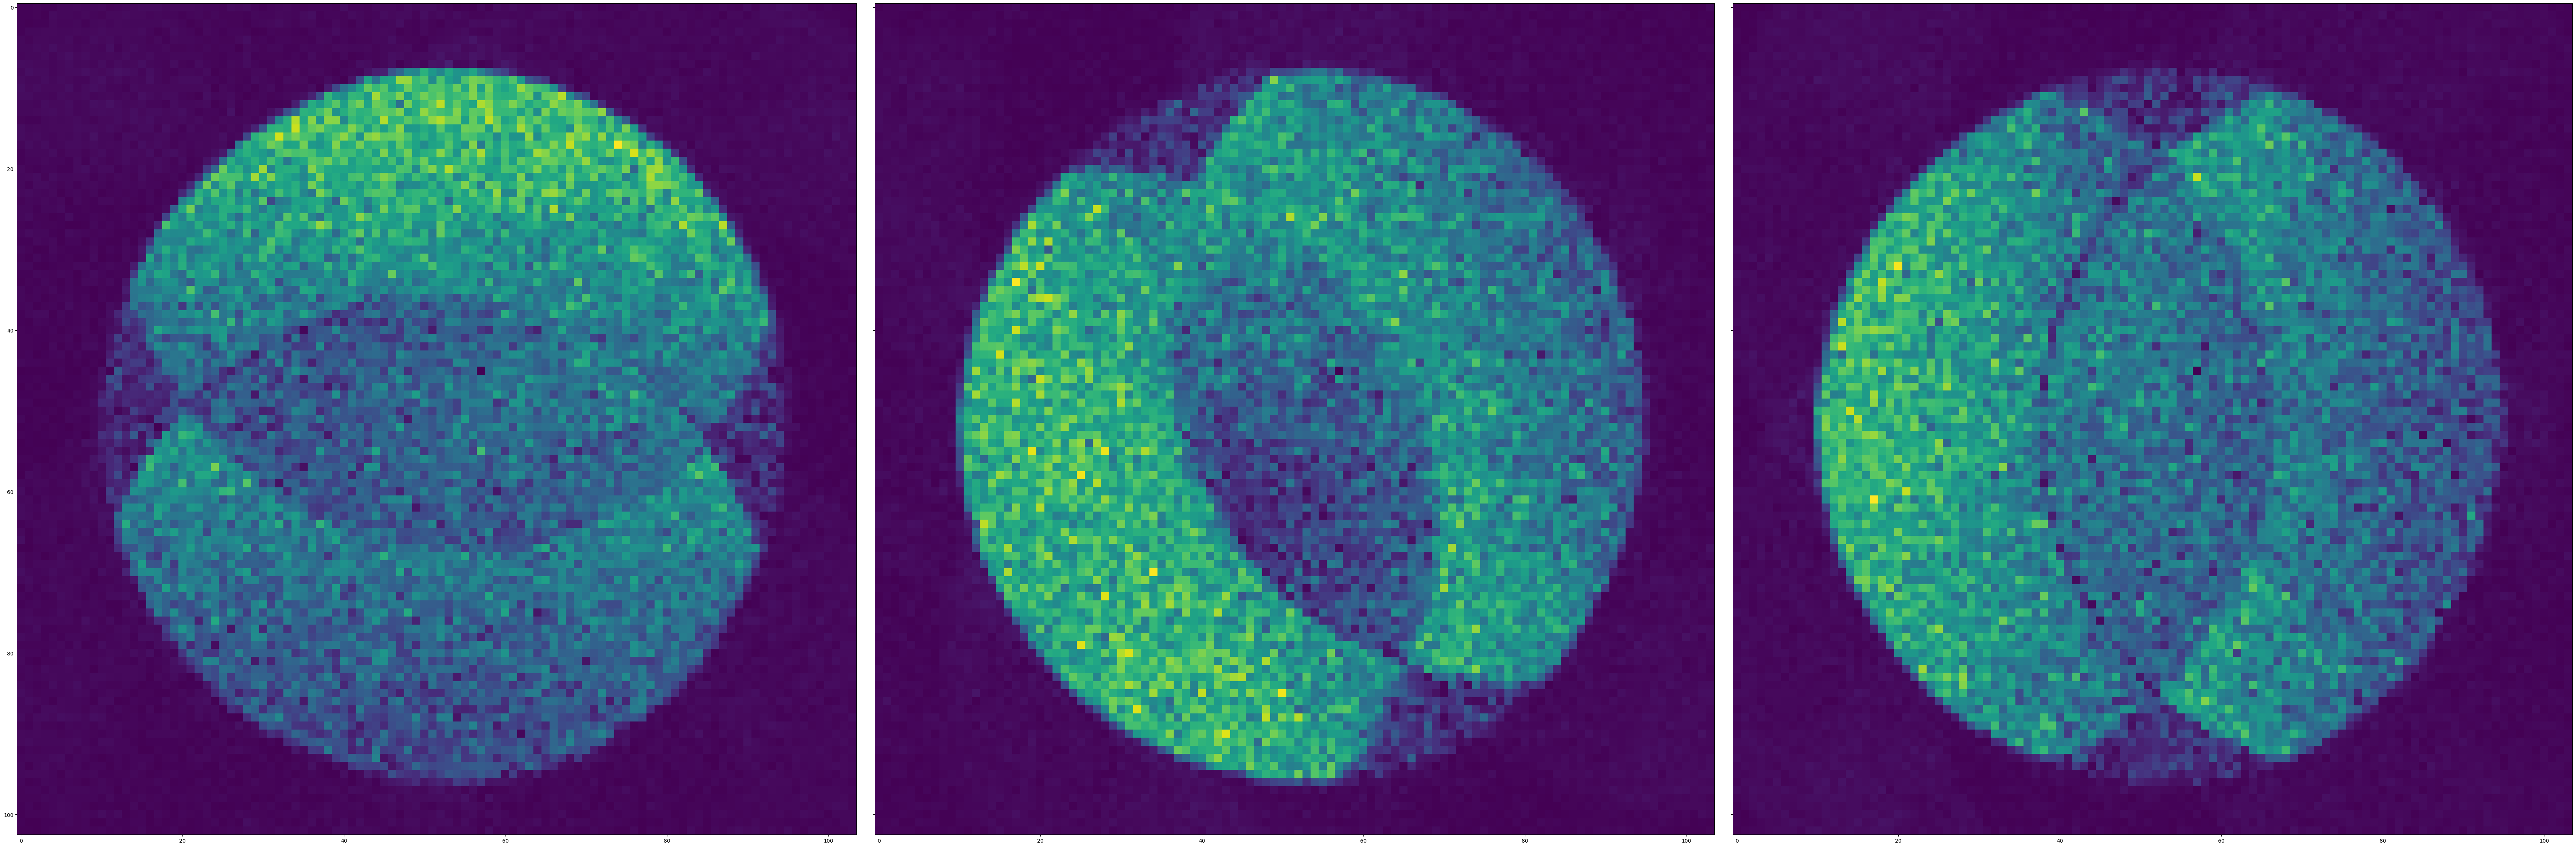

In [16]:
fig =plt.figure(1, figsize=(90, 30))
grid=AxesGrid(fig, 111, nrows_ncols=(1,3),
             axes_pad=0.5,
             share_all=True,
             cbar_location="right",
             cbar_mode="share",
             cbar_size="5%",
             cbar_pad="2%")
im=grid[0].imshow(np.abs(dat4D_Reci[30+pcenter_y, 6+pcenter_x,:,:]))
im=grid[1].imshow(np.abs(dat4D_Reci[10+pcenter_y,28+pcenter_x,:,:]))
im=grid[2].imshow(np.abs(dat4D_Reci[-4+pcenter_y,28+pcenter_x,:,:]))

<ipython-input-25-e70de7d9e1fb>:13: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  grid.cbar_axes[0].colorbar(im)


Text(0.5, 1.0, 'side bands')

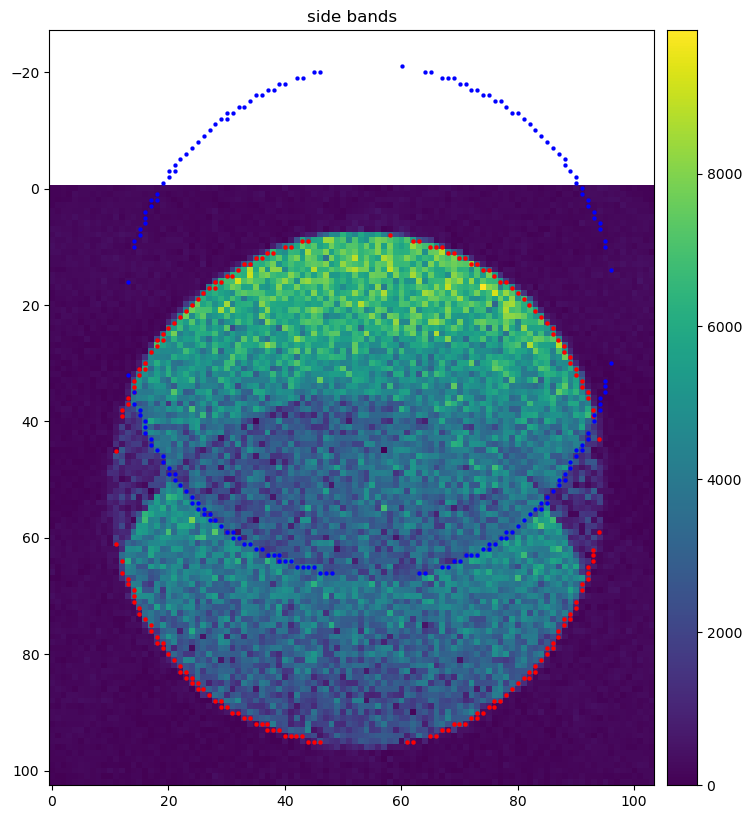

In [25]:
rot_angle = -1.5
distance = 29.1
outline1=np.where(outline>0.5)
fig =plt.figure(1, figsize=(10, 10))
grid=AxesGrid(fig, 111, nrows_ncols=(1,1),
             axes_pad=0.5,
             share_all=False,
             cbar_location="right",
             cbar_mode="each",
             cbar_size="5%",
             cbar_pad="2%")
im=grid[0].imshow(np.abs(dat4D_Reci[30+pcenter_y, 6+pcenter_x,:,:]))
grid.cbar_axes[0].colorbar(im)
grid[0].scatter(outline1[1], outline1[0], linewidth=0.2, color = 'red', marker = ".")
grid[0].scatter(outline1[1]+distance*np.cos(rot_angle), outline1[0]+distance*np.sin(rot_angle), linewidth=0.1, color = 'blue', marker = ".")
grid[0].set_title('side bands')

<ipython-input-31-0a4c1ef16081>:13: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  grid.cbar_axes[0].colorbar(im)


Text(0.5, 1.0, 'side bands')

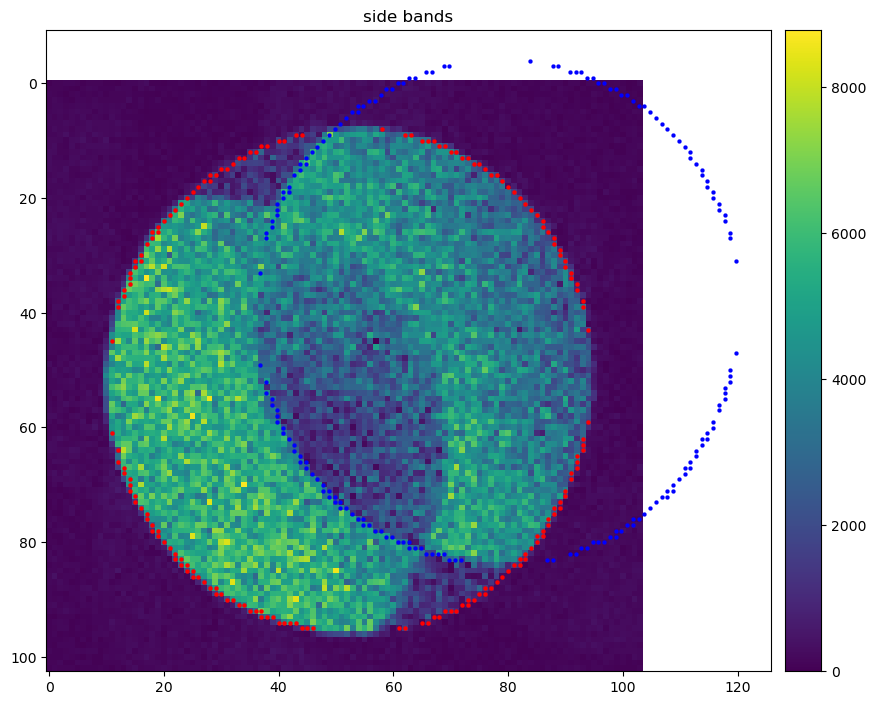

In [31]:
rot_angle = -0.435
distance = 28.4
outline1=np.where(outline>0.5)
fig =plt.figure(1, figsize=(10, 10))
grid=AxesGrid(fig, 111, nrows_ncols=(1,1),
             axes_pad=0.5,
             share_all=False,
             cbar_location="right",
             cbar_mode="each",
             cbar_size="5%",
             cbar_pad="2%")
im=grid[0].imshow(np.abs(dat4D_Reci[10+pcenter_y,28+pcenter_x,:,:]))
grid.cbar_axes[0].colorbar(im)
grid[0].scatter(outline1[1], outline1[0], linewidth=0.2, color = 'red', marker = ".")
grid[0].scatter(outline1[1]+distance*np.cos(rot_angle), outline1[0]+distance*np.sin(rot_angle), linewidth=0.1, color = 'blue', marker = ".")
grid[0].set_title('side bands')

<ipython-input-32-b681f661a732>:13: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  grid.cbar_axes[0].colorbar(im)


Text(0.5, 1.0, 'side bands')

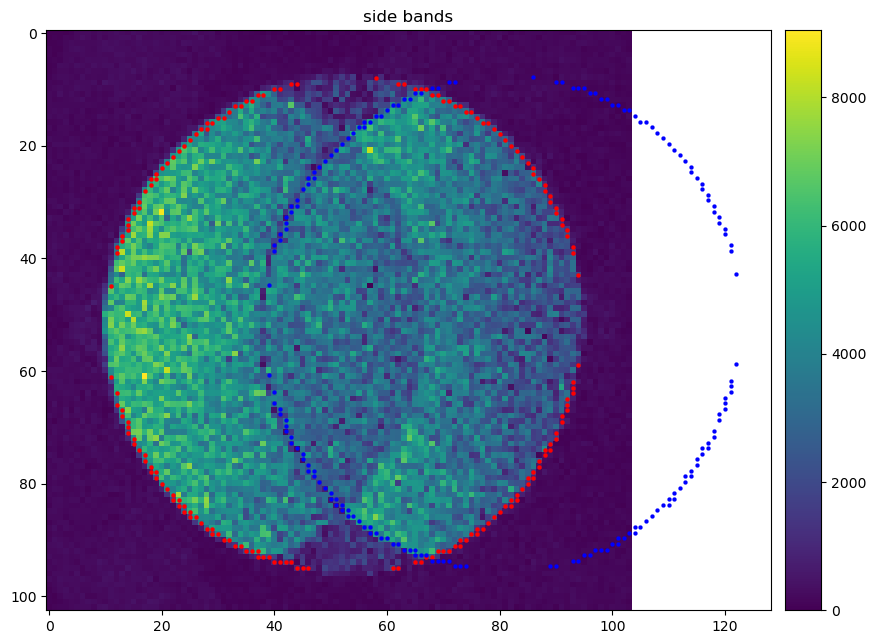

In [32]:
rot_angle = -0.01
distance = 28.0
outline1=np.where(outline>0.5)
fig =plt.figure(1, figsize=(10, 10))
grid=AxesGrid(fig, 111, nrows_ncols=(1,1),
             axes_pad=0.5,
             share_all=False,
             cbar_location="right",
             cbar_mode="each",
             cbar_size="5%",
             cbar_pad="2%")
im=grid[0].imshow(np.abs(dat4D_Reci[-4+pcenter_y,28+pcenter_x,:,:]))
grid.cbar_axes[0].colorbar(im)
grid[0].scatter(outline1[1], outline1[0], linewidth=0.2, color = 'red', marker = ".")
grid[0].scatter(outline1[1]+distance*np.cos(rot_angle), outline1[0]+distance*np.sin(rot_angle), linewidth=0.1, color = 'blue', marker = ".")
grid[0].set_title('side bands')

In [34]:
def ShiftTrotter(mask,dx,dy):
    expanded = np.zeros((mask.shape[0]*3,mask.shape[1]*3), mask.dtype)
    expanded[mask.shape[0]:2*mask.shape[0],mask.shape[1]:2*mask.shape[1]]=mask
    reci_mask=np.fft.fftshift(np.fft.fft2(expanded))
    x_start = -int(expanded.shape[1]/2)
    y_start = -int(expanded.shape[0]/2)
    x_end = x_start + expanded.shape[1]
    y_end = y_start + expanded.shape[0]
    X, Y = np.meshgrid(np.arange(x_start, x_end),np.arange(y_start,y_end))
    X=X*(1.0/expanded.shape[1]) 
    Y=Y*(1.0/expanded.shape[0])
    reci_mask=reci_mask*np.exp(-2j*np.pi*(dx*X+dy*Y))
    expanded = np.real(np.fft.ifft2(np.fft.ifftshift(reci_mask)))>0.5
    return expanded[mask.shape[0]:2*mask.shape[0],mask.shape[1]:2*mask.shape[1]]
def ShiftTrotterFast(mask,dx,dy):
    #the expanded part should be large enough.
    x_shift = int(np.round(dx))
    y_shift = int(np.round(dy))
    if (np.abs(x_shift)>=mask.shape[1])|(np.abs(y_shift)>=mask.shape[0]):
        return np.zeros((mask.shape[0],mask.shape[1]), mask.dtype)
    else:
        expanded = np.zeros((mask.shape[0]*3,mask.shape[1]*3), mask.dtype)
        expanded[mask.shape[0]:2*mask.shape[0],mask.shape[1]:2*mask.shape[1]]=mask
        return expanded[(mask.shape[0]-y_shift):(2*mask.shape[0]-y_shift),(mask.shape[1]-x_shift):(2*mask.shape[1]-x_shift)]

<ipython-input-38-457e471982f7>:26: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  grid.cbar_axes[0].colorbar(im)


Text(0.5, 1.0, 'side bands')

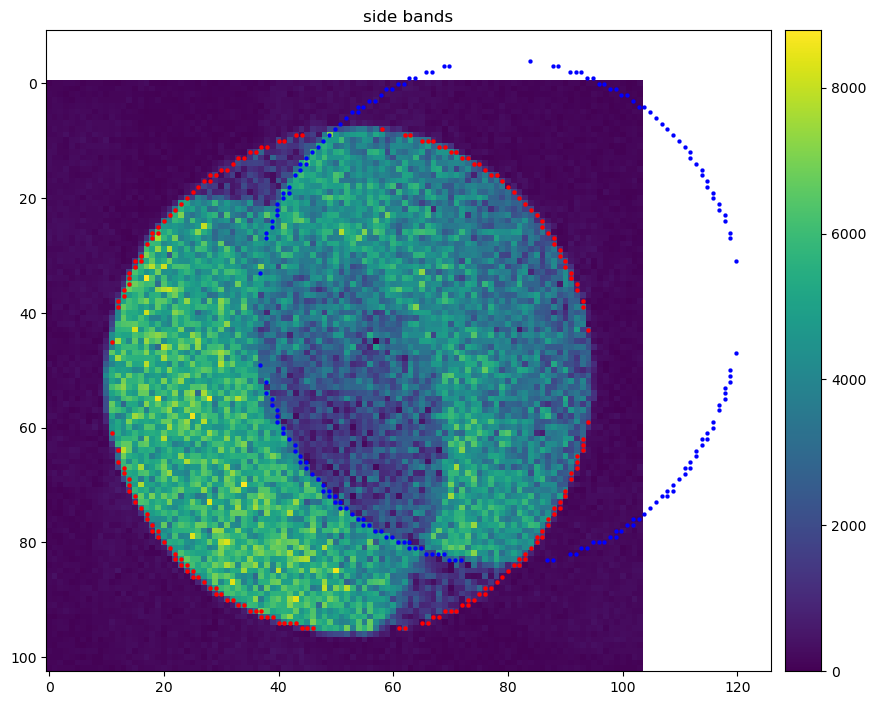

In [38]:
#compute the rotation angle and length of reciprocal scanning vector
#For any diffracton frame indexed as: [center_y+ i, center_x + j]
#the shift vector is: j*kx+i*ky = j*dl*(cos(theta_x), sin(theta_x)) + i*dl*gama*(cos(theta_y), sin(theta_y))=(dx, dy)
dl = 0.977
gama = 0.866636
theta_x = -0.132775
theta_y = 2.98441+np.pi/2
row_idx = 10
col_idx = 28
outline1=np.where(outline>0.5)
shift_x = dl*(col_idx*np.cos(theta_x)+row_idx*np.cos(theta_y)*gama)
shift_y = dl*(col_idx*np.sin(theta_x)+row_idx*np.sin(theta_y)*gama)
RMask = ShiftTrotterFast(BFdisk,shift_x,shift_y)
LMask = ~ShiftTrotterFast(BFdisk,-shift_x,-shift_y)
FFT_Frame =  dat4D_Reci[row_idx+pcenter_y,col_idx+pcenter_x,:,:].copy()
#FFT_Frame[np.where(RMask&LMask&BFdisk)] = 0
fig =plt.figure(1, figsize=(10, 10))
grid=AxesGrid(fig, 111, nrows_ncols=(1,1),
             axes_pad=0.5,
             share_all=False,
             cbar_location="right",
             cbar_mode="each",
             cbar_size="5%",
             cbar_pad="2%")
im=grid[0].imshow(np.abs(FFT_Frame))
grid.cbar_axes[0].colorbar(im)
grid[0].scatter(outline1[1], outline1[0], linewidth=0.2, color = 'red', marker = ".")
grid[0].scatter(outline1[1]+shift_x, outline1[0]+shift_y, linewidth=0.1, color = 'blue', marker = ".")
grid[0].set_title('side bands')

In [39]:
#NION nomination
# For weak phase object: G(Kf,Qp) = |A(Kf)|^2.*delta(Qp) + A(Kf-Qp)A.*(Kf)Psi_s(Qp) +  A(Kf)A.*(Kf+Qp)Psi_s.*(-Qp);
# the phase of left trotter A(Kf-Qp)A.*(Kf)Psi_s(Qp) equals to:
# chi(A(Kf-Qp)) - chi(A(Kf)) + phase(Psi_s(Qp))
def GenAMatrix(freq_x, freq_y, tshift_x, tshift_y, pixel_idx, order):
    #transfrom to 1D array.
    kx = freq_x[pixel_idx]
    ky = freq_y[pixel_idx]
    kx2=kx*kx
    ky2=ky*ky
    kx3=kx2*kx
    ky3=ky2*ky
    kx4=kx3*kx
    ky4=ky3*ky
    kx5=kx4*kx
    ky5=ky4*ky
    kx6=kx5*kx
    ky6=ky5*ky
    k2=kx2+ky2
    k4=k2*k2
    k6=k4*k2
    
    sx=kx-tshift_x
    sy=ky-tshift_y
    sx2=sx*sx
    sy2=sy*sy
    sx3=sx2*sx
    sy3=sy2*sy
    sx4=sx3*sx
    sy4=sy3*sy
    sx5=sx4*sx
    sy5=sy4*sy
    sx6=sx5*sx
    sy6=sy5*sy
    s2=sx2+sy2
    s4=s2*s2
    s6=s4*s2
    #defocus and first order stigma: 
    AMatrix=s2-k2,(sx2-sy2)-(kx2-ky2),(sx*sy-kx*ky)*2.0
    AMatrix=np.asarray(AMatrix)/2.0
    if order>1:
        Matrix2nd=sx*s2-kx*k2,sy*s2-ky*k2,(sx3-3.0*sx*sy2)-(kx3-3.0*kx*ky2),(3.0*sx2*sy-sy3)-(3.0*kx2*ky-ky3)
        AMatrix=np.concatenate((AMatrix, np.asarray(Matrix2nd)/3.0), axis=0)
    if order>2:
        Matrix3rd=s4-k4,(sx2-sy2)*s2-(kx2-ky2)*k2,2.0*sx*sy*s2-2.0*kx*ky*k2, (sx4-6.0*sx2*sy2+sy4)-(kx4-6.0*kx2*ky2+ky4),(4.0*sx*sy3-4.0*sx3*sy)-(4.0*kx*ky3-4.0*kx3*ky)
        AMatrix=np.concatenate((AMatrix, np.asarray(Matrix3rd)/4.0), axis=0)
    if order>3:
        Matrix4th=sx*s4-kx*k4,sy*s4-ky*k4,(sx3-3.0*sx*sy2)*s2-(kx3-3.0*kx*ky2)*k2,(3.0*sx2*sy-sy3)*s2-(3.0*kx2*ky-ky3)*k2,(sx5-10.0*sx3*sy2+5.0*sx*sy4)-(kx5-10.0*kx3*ky2+5.0*kx*ky4), (10.0*sx2*sy3-5.0*sx4*sy-sy5)-(10.0*kx2*ky3-5.0*kx4*ky-ky5)
        AMatrix=np.concatenate((AMatrix, np.asarray(Matrix4th)/5.0), axis=0)
    if order>4:
        Matrix5th=s6-k6,(sx2-sy2)*s4-(kx2-ky2)*k4,2.0*sx*sy*s4-2.0*kx*ky*k4, (sx4-6.0*sx2*sy2+sy4)*s2-(kx4-6.0*kx2*ky2+ky4)*k2,(4.0*sx*sy3-4.0*sx3*sy)*s2-(4.0*kx*ky3-4.0*kx3*ky)*k2,(sx6-sy6-15.0*sx4*sy2+15.0*sx2*sy4)-(kx6-ky6-15.0*kx4*ky2+15.0*kx2*ky4),(20.0*sx3*sy3-6.0*sx5*sy-6.0*sx*sy5)-(20.0*kx3*ky3-6.0*kx5*ky-6.0*kx*ky5)
        AMatrix=np.concatenate((AMatrix, np.asarray(Matrix5th)/6.0), axis=0)
    return AMatrix
def PhaseShift(freq_x, freq_y, tshift_x, tshift_y, aberrations, order):
    """
    freq_x:detector spatial frequency x
    freq_y:detector spatial frequency y
    
    output:
    Chi function
    """
    kx = freq_x+tshift_x
    ky = freq_y+tshift_y
    kx2=kx*kx
    ky2=ky*ky
    kx3=kx2*kx
    ky3=ky2*ky
    kx4=kx3*kx
    ky4=ky3*ky
    kx5=kx4*kx
    ky5=ky4*ky
    kx6=kx5*kx
    ky6=ky5*ky
    k2=kx2+ky2
    k4=k2*k2
    k6=k4*k2
    C1   = aberrations[0]
    C12a = aberrations[1]
    C12b = aberrations[2]
    phase_shift= (C1*k2+C12a*(kx2-ky2)+2.0*C12b*kx*ky)/2.0
    if order>1:
        C21a = aberrations[3]
        C21b = aberrations[4]
        C23a = aberrations[5]
        C23b = aberrations[6]
        phase_shift+= ((C21a*kx+C21b*ky)*k2+C23a*(kx3-3.0*kx*ky2)+C23b*(3.0*kx2*ky-ky3))/3.0
    if order>2:
        C3   = aberrations[7]
        C32a = aberrations[8]
        C32b = aberrations[9]
        C34a = aberrations[10]
        C34b = aberrations[11]
        phase_shift+= (C3*k4+(C32a*(kx2-ky2)+2.0*C32b*kx*ky)*k2+C34a*(kx4-6.0*kx2*ky2+ky4)+C34b*(4.0*kx*ky3-4.0*kx3*ky))/4.0
    if order>3:
        C41a = aberrations[12]
        C41b = aberrations[13]
        C43a = aberrations[14]
        C43b = aberrations[15]
        C45a = aberrations[16]
        C45b = aberrations[17]
        phase_shift+= ((C41a*kx+C41b*ky)*k4+(C43a*(kx3-3.0*kx*ky2)+C43b*(3.0*kx2*ky-ky3))*k2+C45a*(kx5-10.0*kx3*ky2+5.0*kx*ky4)+C45b*(10.0*kx2*ky3-5.0*kx4*ky-ky5))/5.0
    if order>4:
        C5 = aberrations[18]
        C52a = aberrations[19]
        C52b = aberrations[20]
        C54a = aberrations[21]
        C54b = aberrations[22]
        C56a = aberrations[23]
        C56b = aberrations[24]
        phase_shift+= (C5*k6+(C52a*(kx2-ky2)+2.0*C52b*kx*ky)*k4+(C54a*(kx4-6.0*kx2*ky2+ky4)+C54b*(4.0*kx*ky3-4.0*kx3*ky))*k2+C56a*(kx6-ky6-15.0*kx4*ky2+15.0*kx2*ky4)+C56b*(20.0*kx3*ky3-6.0*kx5*ky-6.0*kx*ky5))/6.0
    return phase_shift

In [40]:
X, Y = np.meshgrid(np.arange(0, dat4D_Reci.shape[3]), np.arange(0, dat4D_Reci.shape[2]))
freqx_inter = 1.0/dat4D_Reci.shape[3]
freqy_inter = 1.0/dat4D_Reci.shape[2]
x_freq = (X- dcenter_x)*freqx_inter
y_freq = (Y- dcenter_y)*freqy_inter

In [41]:
# How to solve the aberration coefficient?
# AX = b;
# A is the construction matrix, 
# X is the aberration coefficient [C1, C12a, C12b, C23a, C23b, C21a, C21b, C3, C34a, C34b, C32a, C32b, Qp1, Qp2.. Qpn]';
# b is the phase{G(Kf,Qp)} inside the double overlapped areas.
order = 3
pts_num = 18
for ipt in range(pts_num):
    row_idx=descend_idx[0][ipt+1]
    col_idx=descend_idx[1][ipt+1]
    shift_x = col_idx-pcenter_x
    shift_y = row_idx-pcenter_y
    delta_x = dl*(shift_x*np.cos(theta_x)+shift_y*np.cos(theta_y)*gama)
    delta_y = dl*(shift_x*np.sin(theta_x)+shift_y*np.sin(theta_y)*gama)
    RMask = ShiftTrotterFast(BFdisk,delta_x,delta_y)
    LMask = ~ShiftTrotterFast(BFdisk,-delta_x,-delta_y)
    valid_region = np.where(RMask&LMask&BFdisk)
    AMatrixT = GenAMatrix(x_freq, y_freq, delta_x*freqx_inter, delta_y*freqy_inter, valid_region, order)
    unwarp=unwrap_phase(np.angle(dat4D_Reci[row_idx,col_idx,:,:]),wrap_around=True)
    BMatrixT = unwarp[valid_region]
    if ipt ==0:
        BMatrix = BMatrixT
        AMatrix = np.zeros((AMatrixT.shape[0]+1,AMatrixT.shape[1]), AMatrixT.dtype)
        AMatrix[0:AMatrixT.shape[0],0:AMatrixT.shape[1]] = AMatrixT
        AMatrix[-1,0:AMatrixT.shape[1]] = 1
    else:
        BMatrix = np.concatenate((BMatrix, BMatrixT))
        AMatrixF = np.zeros((AMatrix.shape[0]+1,AMatrix.shape[1]+AMatrixT.shape[1]), AMatrix.dtype)
        AMatrixF[0:AMatrix.shape[0],0:AMatrix.shape[1]] = AMatrix
        AMatrixF[0:AMatrixT.shape[0], AMatrix.shape[1]:AMatrixF.shape[1]]=AMatrixT
        AMatrixF[-1,AMatrix.shape[1]:AMatrixF.shape[1]] =1
        AMatrix = AMatrixF

In [42]:
BMatrixP = AMatrix.dot(BMatrix)
AMatrixP = np.dot(AMatrix, AMatrix.T)
Aberrations = np.linalg.solve(AMatrixP, BMatrixP)
print(Aberrations)

[ 4.75159775e-02  2.02316805e+00 -2.28870749e-01  1.68366222e+00
  1.21166372e+01  9.59625919e+00  6.63681730e+00 -4.15222817e+00
 -3.53290525e+01  3.58579947e+01 -8.62640990e+00  4.93507578e+00
  5.91399775e+00 -2.89839716e+00  1.33953458e+00  1.69982700e+00
  2.30498319e+00  8.77187693e-01 -2.07409261e+00 -9.78267768e-01
  3.58540601e+00 -5.33055003e-01 -2.35748048e+00  5.45320918e+00
  5.37547316e+00 -2.36093824e+00  1.28071789e+00  1.73406270e+00
 -3.51439751e+00  2.16656225e-02]


<ipython-input-43-e8e107e4dd5e>:12: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  grid.cbar_axes[0].colorbar(im)
<ipython-input-43-e8e107e4dd5e>:15: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  grid.cbar_axes[1].colorbar(im)


Text(0.5, 1.0, 'masked probe phase')

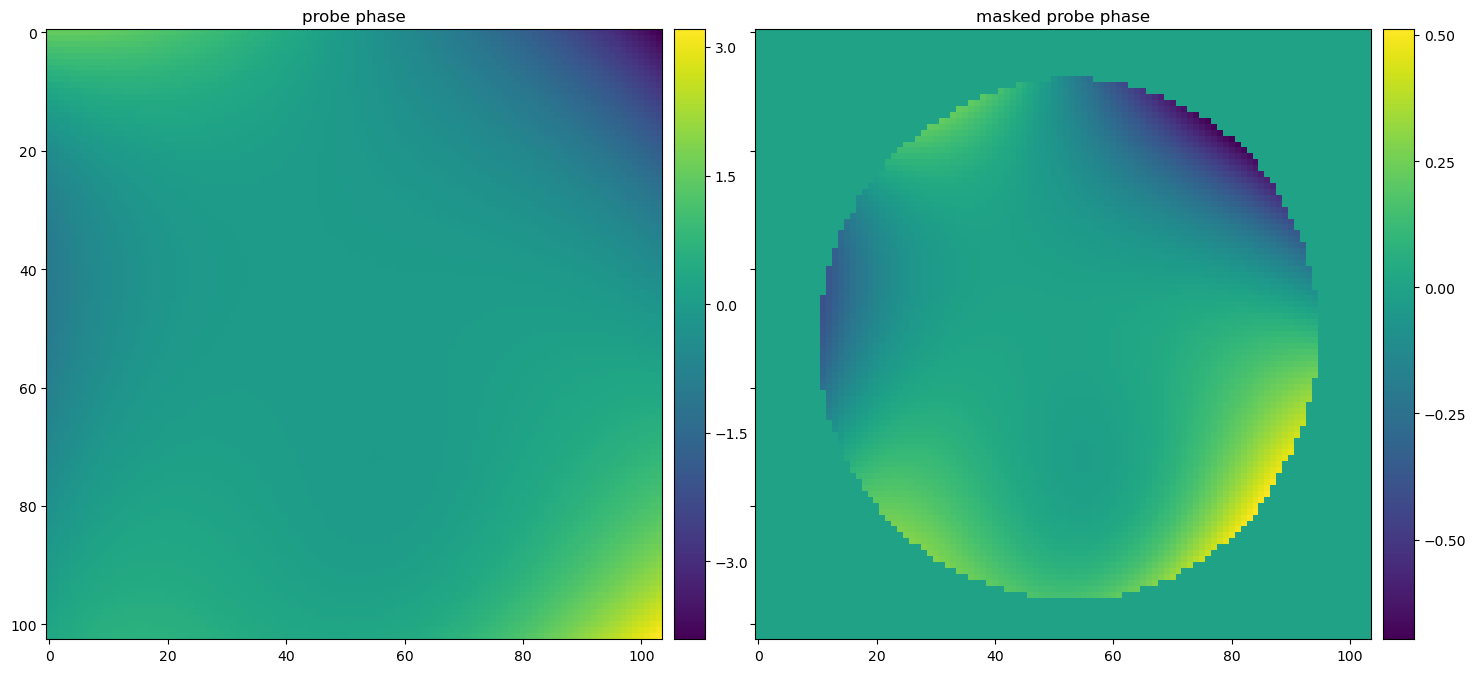

In [43]:
probe_phase= PhaseShift(x_freq, y_freq, 0, 0, Aberrations,order)
masked_phase=probe_phase*BFdisk
fig =plt.figure(1, figsize=(60, 30))
grid=AxesGrid(fig, 236, nrows_ncols=(1,2),
             axes_pad=0.5,
             share_all=False,
             cbar_location="right",
             cbar_mode="each",
             cbar_size="5%",
             cbar_pad="2%")
im=grid[0].imshow(probe_phase)
grid.cbar_axes[0].colorbar(im)
grid[0].set_title('probe phase')
im=grid[1].imshow(masked_phase)
grid.cbar_axes[1].colorbar(im)
grid[1].set_title('masked probe phase')

<ipython-input-44-c05f0b99c3d6>:21: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  grid.cbar_axes[0].colorbar(im)
<ipython-input-44-c05f0b99c3d6>:24: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  grid.cbar_axes[1].colorbar(im)
<ipython-input-44-c05f0b99c3d6>:27: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar impl

Text(0.5, 1.0, 'corrected')

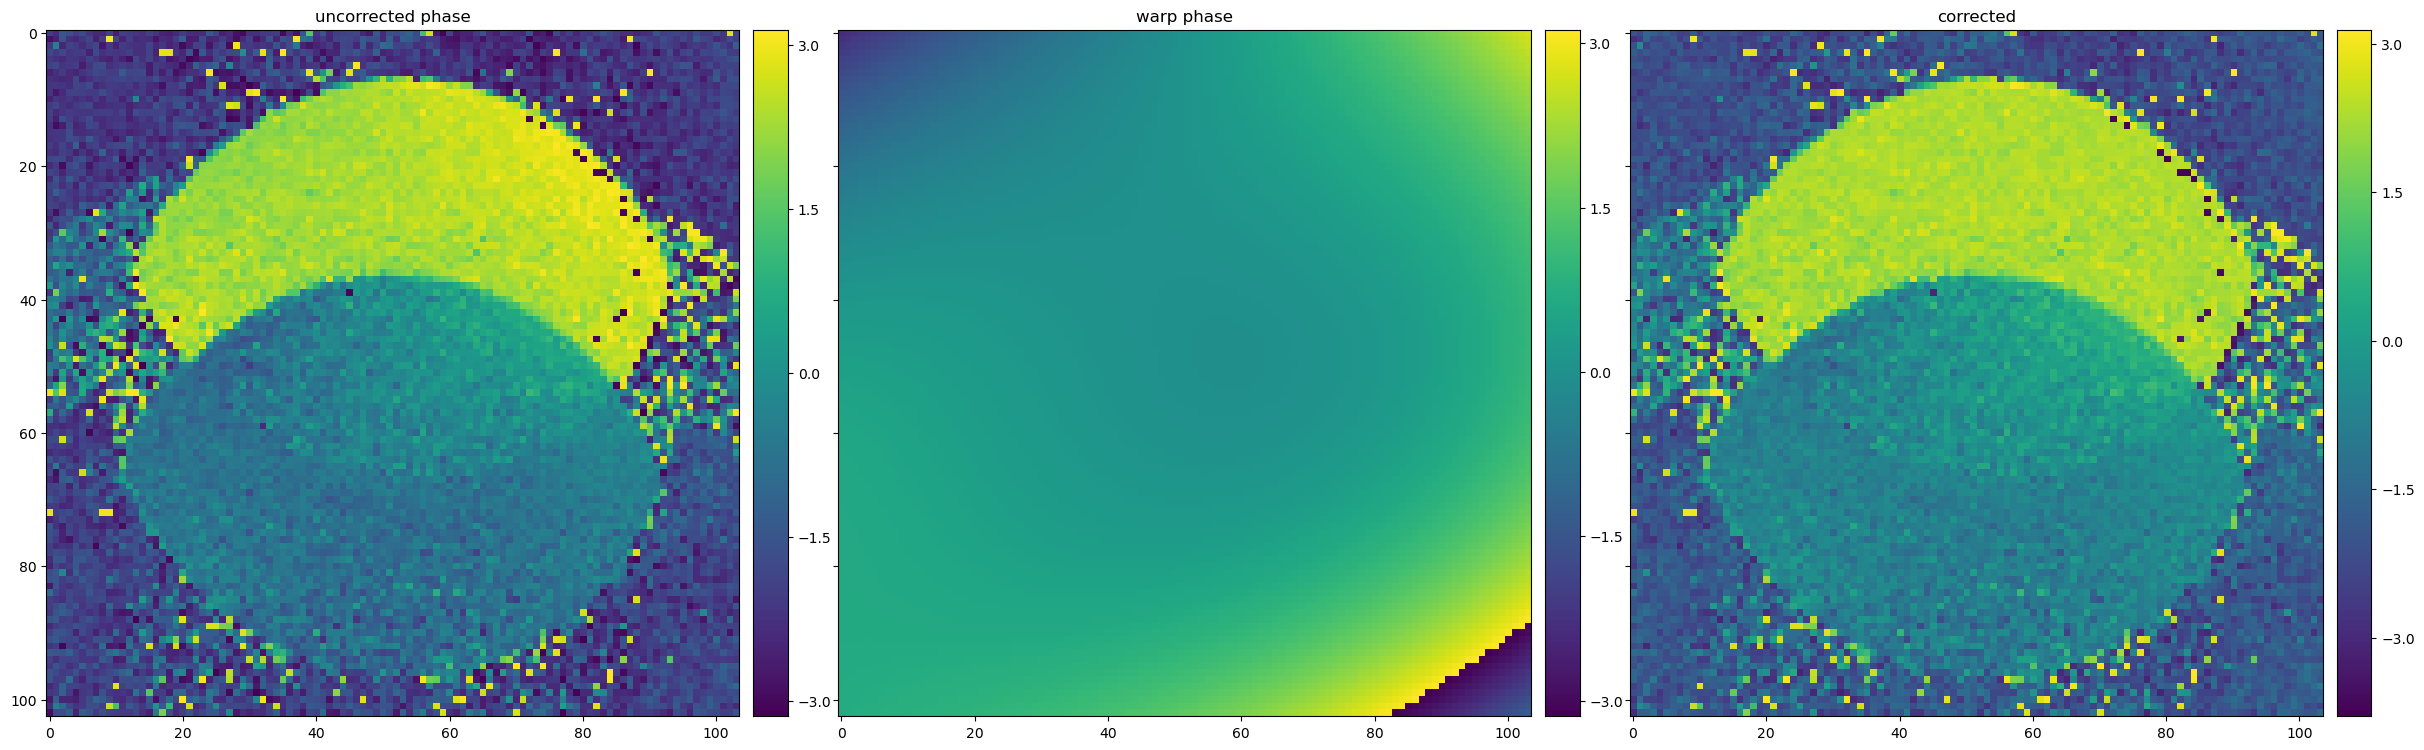

In [44]:
row_idx = 30
col_idx = 6
shift_x = dl*(col_idx*np.cos(theta_x)+row_idx*np.cos(theta_y)*gama)
shift_y = dl*(col_idx*np.sin(theta_x)+row_idx*np.sin(theta_y)*gama)
RMask = ShiftTrotterFast(BFdisk,shift_x,shift_y)
LMask = ~ShiftTrotterFast(BFdisk,-shift_x,-shift_y)
phase_frame = np.angle(dat4D_Reci[row_idx+pcenter_y,col_idx+pcenter_x,:,:])
corrected =  PhaseShift(x_freq, y_freq, -shift_x*freqx_inter, -shift_y*freqy_inter, Aberrations,3) - PhaseShift(x_freq, y_freq, 0, 0, Aberrations,3)
trotter_phase = np.zeros_like(corrected)
trotter_phase[np.where(RMask&LMask&BFdisk)] = corrected[np.where(RMask&LMask&BFdisk)]
corrected_warp=np.exp(1j*corrected)
fig =plt.figure(1, figsize=(30, 10))
grid=AxesGrid(fig, 111, nrows_ncols=(1,3),
             axes_pad=0.5,
             share_all=False,
             cbar_location="right",
             cbar_mode="each",
             cbar_size="5%",
             cbar_pad="2%")
im=grid[0].imshow(phase_frame)
grid.cbar_axes[0].colorbar(im)
grid[0].set_title('uncorrected phase')
im=grid[1].imshow(np.angle(corrected_warp))
grid.cbar_axes[1].colorbar(im)
grid[1].set_title('warp phase')
im=grid[2].imshow(phase_frame - trotter_phase)
grid.cbar_axes[2].colorbar(im)
grid[2].set_title('corrected')

In [45]:
LTrotterSum = np.zeros(power_spectra.shape,dtype=complex)
RTrotterSum = np.zeros(power_spectra.shape,dtype=complex)
TrotterPixelNum = np.zeros(power_spectra.shape, dtype =int)

In [46]:
#reconstruction without aberration correction.
for i in range (power_spectra.shape[0]):
    print('SSB',int((i+1)/power_spectra.shape[0]*100),'%',end='\r')
    for j in range (power_spectra.shape[1]):
        shift_x = j-pcenter_x
        shift_y = i-pcenter_y
        delta_x = dl*(shift_x*np.cos(theta_x)+shift_y*np.cos(theta_y)*gama)
        delta_y = dl*(shift_x*np.sin(theta_x)+shift_y*np.sin(theta_y)*gama)
        RMask = ShiftTrotterFast(BFdisk,delta_x,delta_y)
        LMask = ~ShiftTrotterFast(BFdisk,-delta_x,-delta_y)
        if (shift_x==0)&(shift_y==0):
            valid_region = np.where(BFdisk)
        else:
            valid_region = np.where(RMask&LMask&BFdisk)
        TrotterPixelNum[i,j] = valid_region[0].shape[0]
        new_frame = dat4D_Reci[i,j,:,:]
        new_frame = new_frame[valid_region]
        if TrotterPixelNum[i,j]>0:
            RTrotterSum[i,j]=np.sum(new_frame)/TrotterPixelNum[i,j]
        else:
            RTrotterSum[i,j]=0

<ipython-input-47-041665e7bbed>:11: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  grid.cbar_axes[0].colorbar(im)
<ipython-input-47-041665e7bbed>:14: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  grid.cbar_axes[1].colorbar(im)


Text(0.5, 1.0, 'Right Trotter amp')

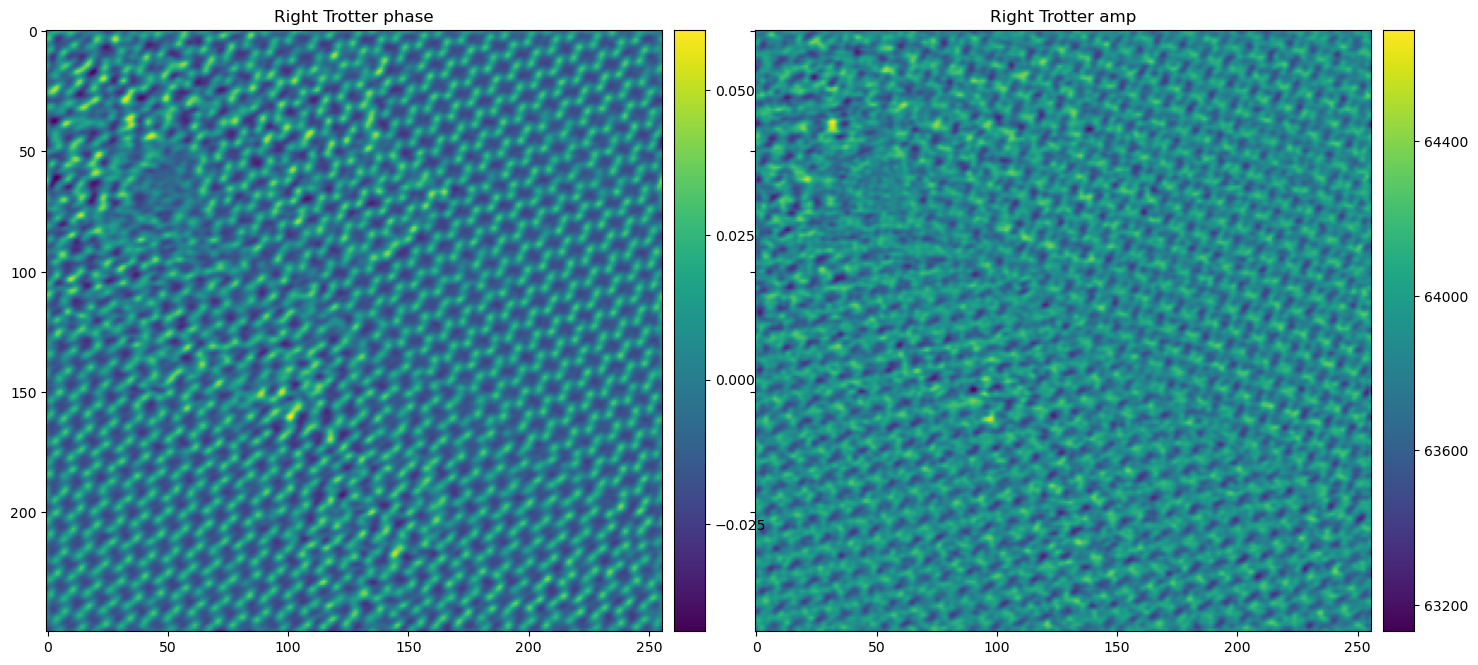

In [47]:
objectR =IFFT_2D(RTrotterSum*TrotterPixelNum)
fig =plt.figure(1, figsize=(60, 30))
grid=AxesGrid(fig, 236, nrows_ncols=(1,2),
             axes_pad=0.5,
             share_all=False,
             cbar_location="right",
             cbar_mode="each",
             cbar_size="5%",
             cbar_pad="2%")
im=grid[0].imshow(-np.angle(objectR))
grid.cbar_axes[0].colorbar(im)
grid[0].set_title('Right Trotter phase')
im=grid[1].imshow(np.abs(objectR))
grid.cbar_axes[1].colorbar(im)
grid[1].set_title('Right Trotter amp')

In [48]:
#Then we make aberration correction using determined aberration coefficient in this step
for i in range (power_spectra.shape[0]):
    print('SSB',int((i+1)/power_spectra.shape[0]*100),'%',end='\r')
    for j in range (power_spectra.shape[1]):
        shift_x = j-pcenter_x
        shift_y = i-pcenter_y
        delta_x = dl*(shift_x*np.cos(theta_x)+shift_y*np.cos(theta_y)*gama)
        delta_y = dl*(shift_x*np.sin(theta_x)+shift_y*np.sin(theta_y)*gama)
        RMask = ShiftTrotterFast(BFdisk,delta_x,delta_y)
        LMask = ~ShiftTrotterFast(BFdisk,-delta_x,-delta_y)
        if (shift_x==0)&(shift_y==0):
            valid_region = np.where(BFdisk)
        else:
            valid_region = np.where(RMask&LMask&BFdisk)
        TrotterPixelNum[i,j] = valid_region[0].shape[0]
        corrected = PhaseShift(x_freq, y_freq, -delta_x*freqx_inter, -delta_y*freqy_inter, Aberrations,3) - PhaseShift(x_freq, y_freq, 0, 0, Aberrations,3)
        new_frame = dat4D_Reci[i,j,:,:]/np.exp(1j*corrected)
        new_frame = new_frame[valid_region]
        if TrotterPixelNum[i,j]>0:
            RTrotterSum[i,j]=np.sum(new_frame)/TrotterPixelNum[i,j]
        else:
            RTrotterSum[i,j]=0

<ipython-input-49-6ce23d4564df>:10: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  grid.cbar_axes[0].colorbar(im)
<ipython-input-49-6ce23d4564df>:13: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  grid.cbar_axes[1].colorbar(im)
<ipython-input-49-6ce23d4564df>:16: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar impl

Text(0.5, 1.0, 'Pixel Number')

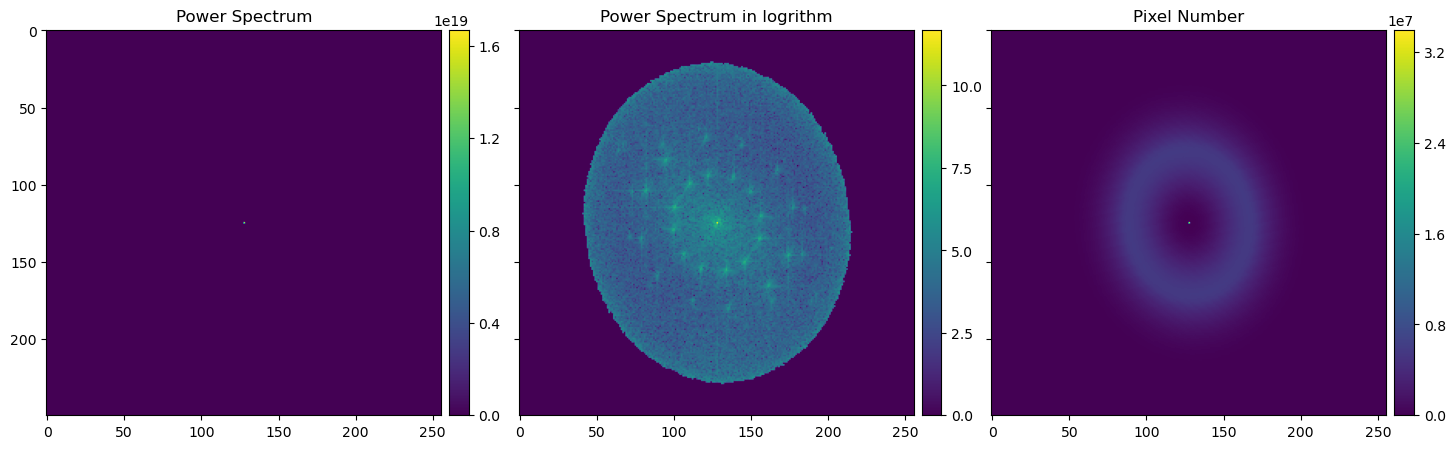

In [49]:
fig =plt.figure(1, figsize=(60, 20))
grid=AxesGrid(fig, 236, nrows_ncols=(1,3),
             axes_pad=0.5,
             share_all=False,
             cbar_location="right",
             cbar_mode="each",
             cbar_size="5%",
             cbar_pad="2%")
im=grid[0].imshow(np.square(np.abs(RTrotterSum*TrotterPixelNum)))
grid.cbar_axes[0].colorbar(im)
grid[0].set_title('Power Spectrum')
im=grid[1].imshow(np.log10(1+np.square(np.abs(RTrotterSum))))
grid.cbar_axes[1].colorbar(im)
grid[1].set_title('Power Spectrum in logrithm')
im=grid[2].imshow(np.square(TrotterPixelNum))
grid.cbar_axes[2].colorbar(im)
grid[2].set_title('Pixel Number')

<ipython-input-50-041665e7bbed>:11: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  grid.cbar_axes[0].colorbar(im)
<ipython-input-50-041665e7bbed>:14: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  grid.cbar_axes[1].colorbar(im)


Text(0.5, 1.0, 'Right Trotter amp')

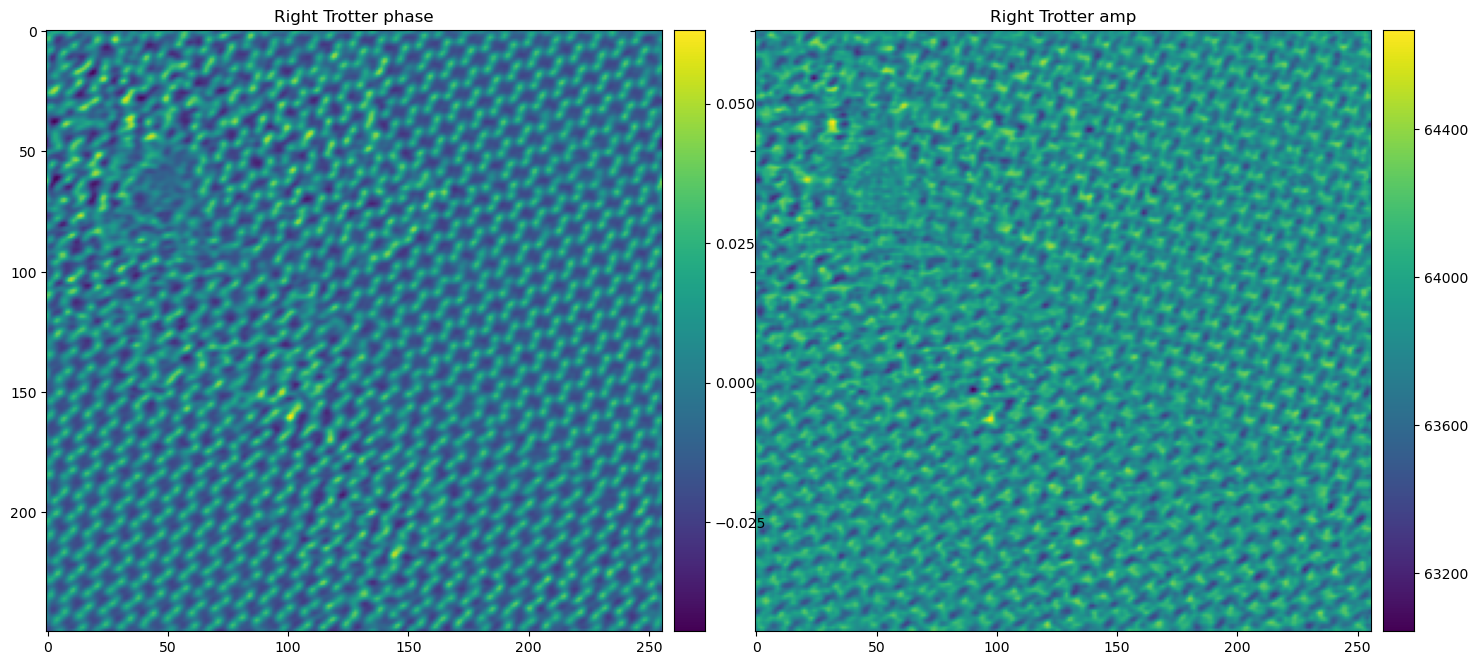

In [50]:
objectR =IFFT_2D(RTrotterSum*TrotterPixelNum)
fig =plt.figure(1, figsize=(60, 30))
grid=AxesGrid(fig, 236, nrows_ncols=(1,2),
             axes_pad=0.5,
             share_all=False,
             cbar_location="right",
             cbar_mode="each",
             cbar_size="5%",
             cbar_pad="2%")
im=grid[0].imshow(-np.angle(objectR))
grid.cbar_axes[0].colorbar(im)
grid[0].set_title('Right Trotter phase')
im=grid[1].imshow(np.abs(objectR))
grid.cbar_axes[1].colorbar(im)
grid[1].set_title('Right Trotter amp')

In [51]:
#go back to the rotation of real space.
trans_matrix = np.array([[np.sin(theta_y-theta_x)/gama, np.cos(theta_y-theta_x)/gama, 0], [0, 1.0, 0],  [0, 0, 1]])
#trans_matrix = np.array([[np.cos(theta_x)/gama, -np.sin(theta_x)/gama, 0], [np.cos(theta_y), -np.sin(theta_y), 0],  [0, 0, 1]])
shift_x = (objectR.shape[1]-trans_matrix[1,0]*objectR.shape[0]-trans_matrix[1,1]*objectR.shape[1])/2
shift_y = (objectR.shape[0]-trans_matrix[0,0]*objectR.shape[0]-trans_matrix[0,1]*objectR.shape[1])/2
trans_matrix[0,2] = shift_y
trans_matrix[1,2] = shift_x
inv_matrix = np.linalg.inv(trans_matrix)
recoverP = interpolation.affine_transform(np.angle(objectR), inv_matrix)
recoverA = interpolation.affine_transform(np.abs(objectR), inv_matrix)

<ipython-input-52-9905602d39cb>:10: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  grid.cbar_axes[0].colorbar(im)


Text(0.5, 1.0, 'Right Trotter phase')

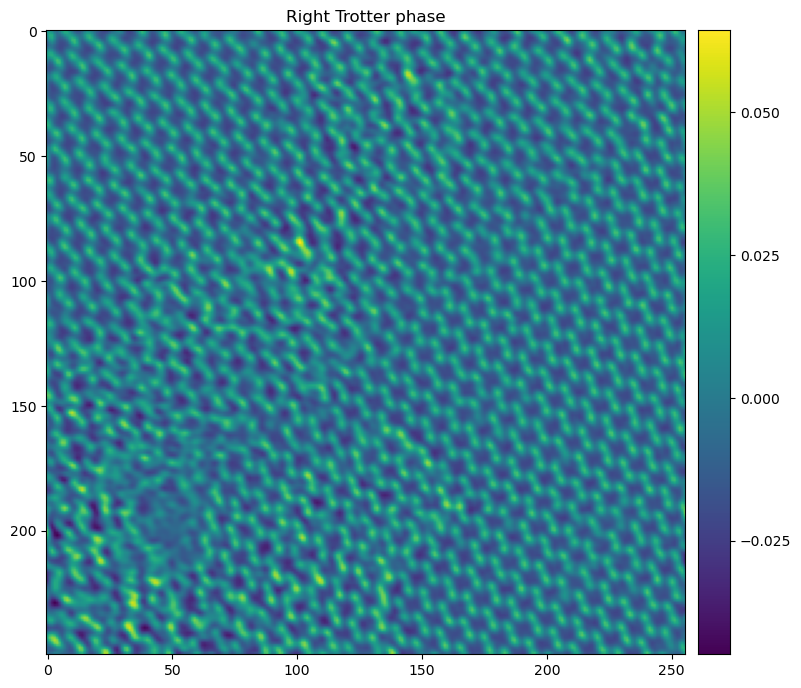

In [52]:
fig =plt.figure(1, figsize=(30, 30))
grid=AxesGrid(fig, 236, nrows_ncols=(1,1),
             axes_pad=0.5,
             share_all=False,
             cbar_location="right",
             cbar_mode="each",
             cbar_size="5%",
             cbar_pad="2%")
im=grid[0].imshow(-recoverP)
grid.cbar_axes[0].colorbar(im)
grid[0].set_title('Right Trotter phase')

<ipython-input-53-f4672055e91c>:12: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  grid.cbar_axes[0].colorbar(im)


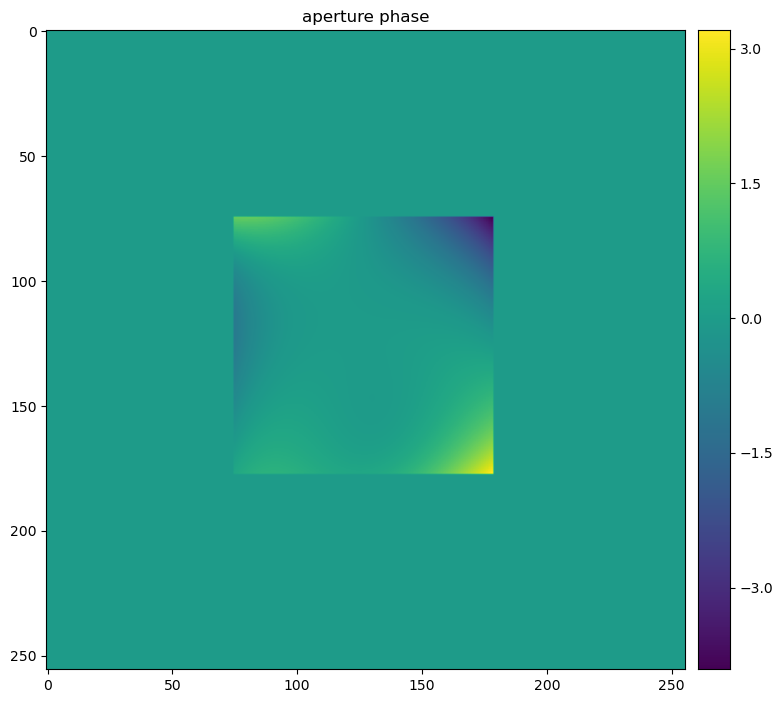

In [53]:
aper_phase = np.zeros_like(pacbed)
aper_phase[y_start:y_end,x_start:x_end] = probe_phase
fig =plt.figure(1, figsize=(30, 30))
grid=AxesGrid(fig, 236, nrows_ncols=(1,1),
             axes_pad=0.5,
             share_all=False,
             cbar_location="right",
             cbar_mode="each",
             cbar_size="5%",
             cbar_pad="2%")
im=grid[0].imshow(aper_phase)
grid.cbar_axes[0].colorbar(im)
grid[0].set_title('aperture phase')
np.save("probe phase.npy", -np.float32(aper_phase))

In [71]:
np.shape(dat4d)

(250, 256, 256, 256)